# Visualización de la información: Practica 1

Febrero 28 2021

Hernández Lozano Juan Pablo

## Primera Parte

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## RGB

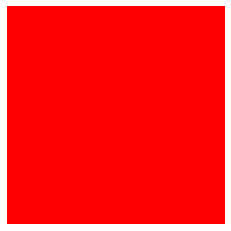

In [24]:
M = 64
N = 64
img = np.zeros((M,N,3))
img.shape
# populate array
#Rojo
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((1.0,0.0,0.0))
plt.axis('off')
plt.imshow(img)

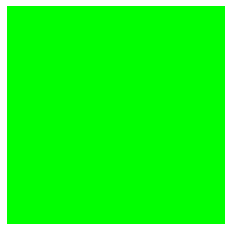

In [26]:
#Verde
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((0.0,1.0,0.))
plt.axis('off')
plt.imshow(img)

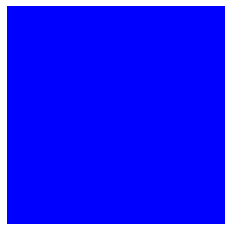

In [25]:
# Azul
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((0.0,0.0,1.))
plt.axis('off')
plt.imshow(img)

## Matices verticales RGB

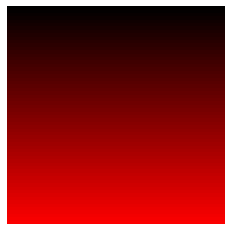

In [31]:
# Matices de rojo

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((f/64,0.0,0.0))
plt.axis('off')
plt.imshow(img)

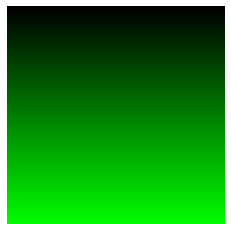

In [34]:
# Matices de verde

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((0.0,f/64,0.0))
plt.axis('off')
plt.imshow(img)

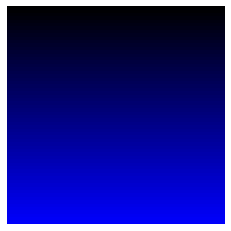

In [35]:
# Matices de Azul

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((0.0,0.0,f/64))
plt.axis('off')
plt.imshow(img)

In [42]:
# Matices Veticales CMY

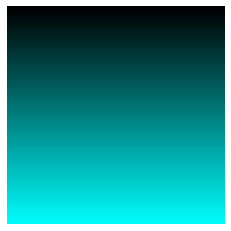

In [40]:
# Matices de cian

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((0.0,f/64,f/64))
plt.axis('off')
plt.imshow(img)

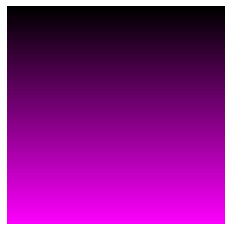

In [43]:
# Matices de magenta

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((f/64,0.0,f/64))
plt.axis('off')
plt.imshow(img)

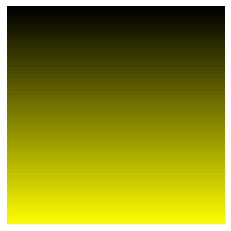

In [38]:
# Matices de amarillo

for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((f/64,f/64,0.0))
plt.axis('off')
plt.imshow(img)

## Matices horizontales de rojo

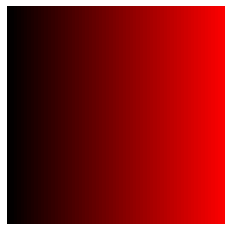

In [45]:
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((c/64,0.0,0.0))
plt.axis('off')
plt.imshow(img)

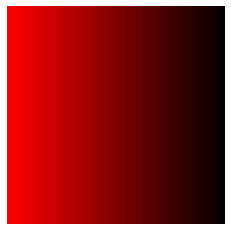

In [50]:
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((1-(c/64),0.0,0.0))
plt.axis('off')
plt.imshow(img)

## Escala de grises vertical:

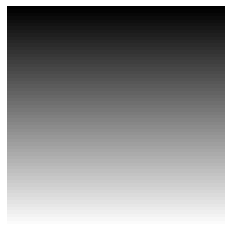

In [51]:
for f in range(M):
    for c in range(N):
        img[f,c,:]=np.array((f/64,f/64,f/64))
plt.axis('off')
plt.imshow(img)

## Segunda Parte

Genere círculos concéntricos en una imagen usando distintos colores (pueden ser generados de manera
aleatoria).

In [142]:
import random
def randomCircle():

    aarr = np.array((random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)))
    barr = np.array((random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)))
    carr = np.array((random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)))
    darr = np.array((random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)))

    M = 200
    N = 200
    img = np.zeros((M,N,3))
    img.shape
    # populate array
    #Rojo
    for f in range(M):
        for c in range(N):
            if ((f-100)**2+(c-100)**2) <= (22)**2:
                img[f,c,:] = aarr

            elif ((f-100)**2+(c-100)**2) > (22)**2 and ((f-100)**2+(c-100)**2) <= (2*22)**2:
                img[f,c,:] = barr

            elif ((f-100)**2+(c-100)**2) > (2*22)**2 and ((f-100)**2+(c-100)**2) <= (3*22)**2:
                img[f,c,:] = carr 
            
            elif ((f-100)**2+(c-100)**2) > (3*22)**2 and ((f-100)**2+(c-100)**2) <= (4*22)**2:
                img[f,c,:] = darr  

            else:
                img[f,c,:] = np.array((0.0,0.0,0.0))
    plt.axis('off')
    plt.imshow(img)

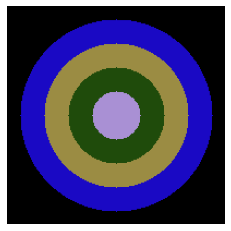

In [144]:
randomCircle()

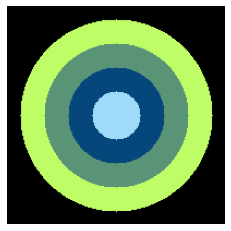

In [145]:
randomCircle()

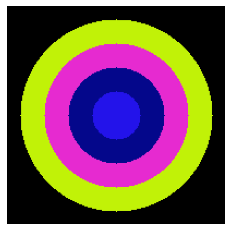

In [146]:
randomCircle()

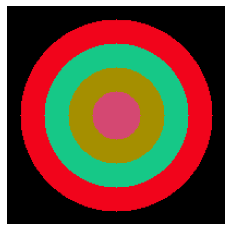

In [147]:
randomCircle()

En los circulos generados aleatoriamente podemos decir que en todos se tiene una buena apresiación del contraste.

Para obtener un mejor constraste entre círculos contiguos se necesita que estos esten más cargados hacia componentes diferentes R G B en un principio. Para un contraste aún mayor se puede sugerir una mayor diferencia en la saturación de los colores, con un círculo tendiendo a los matices oscuros y el otro hacias matices claros.

## Tercera Parte

Conversion de una imagen en el modelo RGB al modelo HSI

declaramos las funciones de conversión:

In [66]:
def theta(r,g,b):
    return np.arccos( 0.5*( (r-g)+(r-b) ) / (np.sqrt( (r-g)**2 +(r-b)*(g-b) ) ) )

def hue(r,g,b):
    if g >= b:
        return theta(r,g,b)
    else:
        return 360 -theta(r,g,b)

def saturation(r,g,b):
    return 1 - 3*min(r,g,b)

def intensity(r,g,b):
    return (r+g+b)/3

Importamos la imagen a convertir

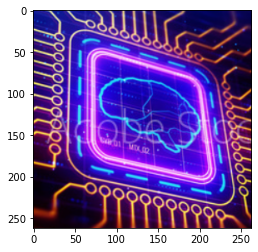

In [70]:
import matplotlib.cbook as cbook
with cbook.get_sample_data('D:\Imágenes\ds.png') as image_file:
    img = plt.imread(image_file)
    plt.imshow(img)


Se define una función que aplique las conversiones y la implementamos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


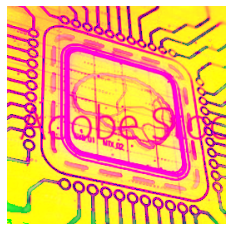

In [106]:
def RGB_to_HSI(img):
    l = img.shape
    a = l[0]
    y = l[1]
    img2 = np.zeros((a,y,3))
    for i in range(a):
        for j in range(y):
            rgb = img[i,j,:]
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]

            img2[i,j,:]=np.array((hue(r,g,b),saturation(r,g,b),intensity(r,g,b)))
    plt.axis('off')
    plt.imshow(img2)

RGB_to_HSI(img)